In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread("Lena.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# Resizing images to 128*128, 64*64, 32*32, and 16*16
gray_128 = cv2.resize(gray, (128, 128))
gray_64  = cv2.resize(gray, (64, 64))
gray_32  = cv2.resize(gray, (32, 32))
gray_16  = cv2.resize(gray, (16, 16))

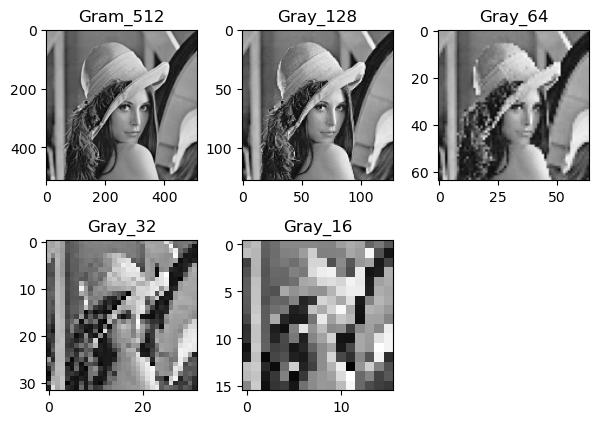

In [5]:
# Pyplot by default it displays in same area
plt.figure(dpi=100, figsize=(7,5))
titles = ['Gram_512', 'Gray_128', 'Gray_64', 'Gray_32', 'Gray_16']
images = [gray, gray_128, gray_64, gray_32, gray_16]
plt.subplots_adjust(hspace=0.2, wspace=0.3)
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
plt.show()

In [6]:
gray_128_1 = cv2.resize(gray_128, (512, 512))
gray_64_1  = cv2.resize(gray_64, (512, 512))
gray_32_1  = cv2.resize(gray_32, (512, 512))
gray_16_1  = cv2.resize(gray_16, (512, 512))

cv2.imshow('gray_512', gray)
cv2.imshow('gray_128', gray_128_1)
cv2.imshow('gray_64', gray_64_1)
cv2.imshow('gray_32', gray_32_1)
cv2.imshow('gray_16', gray_16_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Clarity of image decreases as we reduce the number of pixels but displaying it in same size

In [7]:
# 0-255, 0-127, 0-63, 0-31, 0-15, 0-7, 0-3, and 0-1
# normalization can be understood as to how we change an image’s pixel intensity

height, width = gray.shape
zeroes = np.zeros((height, width))

new_127 = cv2.normalize(gray, zeroes, 0, 127, cv2.NORM_MINMAX)
new_63 = cv2.normalize(gray, zeroes, 0, 63, cv2.NORM_MINMAX)
new_31 = cv2.normalize(gray, zeroes, 0, 31, cv2.NORM_MINMAX)
new_15 = cv2.normalize(gray, zeroes, 0, 15, cv2.NORM_MINMAX)
new_7 = cv2.normalize(gray, zeroes, 0, 7, cv2.NORM_MINMAX)
new_3 = cv2.normalize(gray, zeroes, 0, 3, cv2.NORM_MINMAX)
new_1 = cv2.normalize(gray, zeroes, 0, 1, cv2.NORM_MINMAX)
# MINMAX is responsible for changing the intensity to given range

# cv2.imshow('new_512', gray)
# cv2.imshow('new_127', new_127)
# cv2.imshow('new_63', new_63)
# cv2.imshow('new_31', new_31)
# cv2.imshow('new_15', new_15)
# cv2.imshow('new_7', new_7)
# cv2.imshow('new_3', new_3)
# cv2.imshow('new_1', new_1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

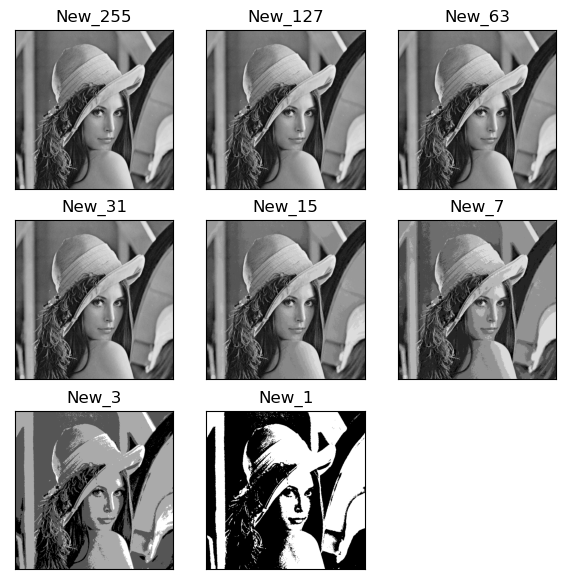

In [8]:
plt.figure(dpi=100, figsize=(7,7))
titles_new = ['New_255', 'New_127', 'New_63', 'New_31', 'New_15', 'New_7', 'New_3', 'New_1']
images_new = [gray, new_127, new_63, new_31, new_15, new_7, new_3, new_1]

from matplotlib import colors

val = [255, 127, 63, 31, 15, 7, 3, 1]
# plt.subplots_adjust(hspace=0.2, wspace=0.1)
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(images_new[i], 'gray')
    plt.title(titles_new[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

Method2

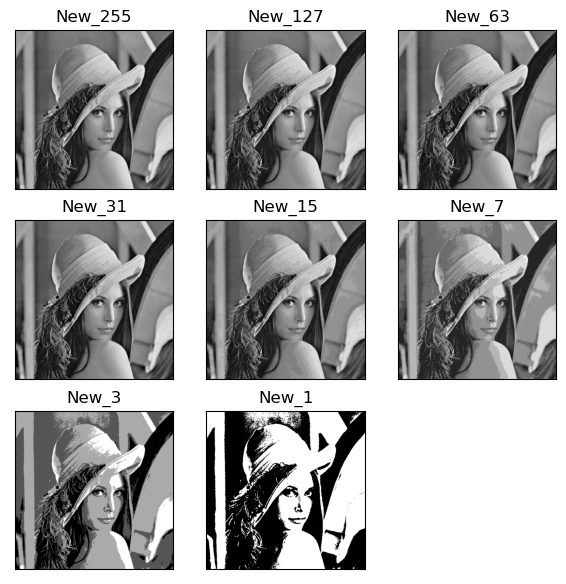

In [9]:
# 0-255, 0-127, 0-63, 0-31, 0-15, 0-7, 0-3, and 0-1
img_127 = gray//2
img_63  = img_127//2
img_31  = img_63//2
img_15  = img_31//2
img_7   = img_15//2
img_3   = img_7//2
img_1   = img_3//2


plt.figure(dpi=100, figsize=(7,7))
val = [255, 127, 63, 31, 15, 7, 3, 1]
titles2 = ['New_255', 'New_127', 'New_63', 'New_31', 'New_15', 'New_7', 'New_3', 'New_1']
images2 = [gray, img_127, img_63, img_31, img_15, img_7, img_3, img_1]

for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

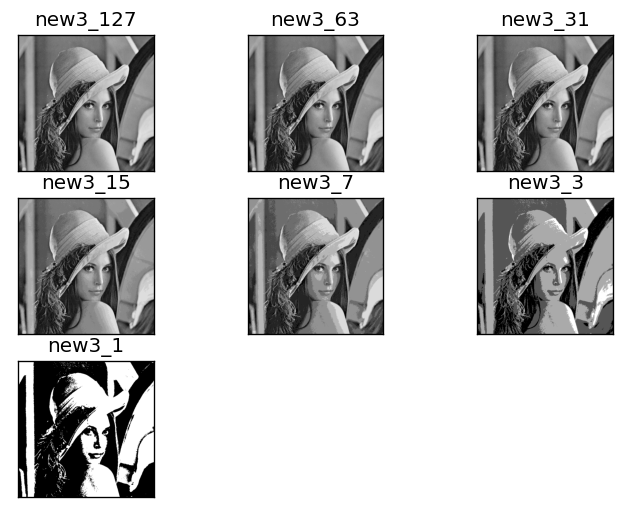

In [10]:
# min1 = gray.min()

# new3_127 = np.zeros((512, 512))


# ex = gray.astype(float)


# new3_127 = ex - min1

# print(new3_127)

# max1 = new3_127.max()

# new3_127 = new3_127/max1

# print(new3_127)

# new3_127 = new3_127 * 1

# new3_127 = new3_127.astype(int)
# print(new3_127)

# plt.imshow(new3_127, 'gray')

# user defined function to reduce pixel range using monitonicity implementation
names = ['new3_127', 'new3_63', 'new3_31', 'new3_15', 'new3_7', 'new3_3', 'new3_1']
vals = [127, 63, 31, 15, 7, 3, 1]

plt.figure(figsize=(7,5), dpi=120)
for i in range(len(vals)):
    min1 = gray.min()
    ex = gray.astype(float)
    
    img3 = np.zeros((512, 512))
    
    # range 0 - k
    img3 = ex - min1
    max1 = img3.max()
    # range 0 - 1
    img3 = img3/max1
    # range 0 - req
    img3 = img3 * vals[i]
    
#     if(vals[i]==1):
    img3 = np.round_(img3)
    img3 = img3.astype(int)
#     else:
#         img3 = img3.astype(int)
#     print(img3)
    plt.subplot(3, 3, i+1)
    plt.imshow(img3, 'gray')
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
    

# Done

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def displayimgcv2(img):
    cv.imshow("Image",img)
    cv.waitKey(0)
    cv.destroyAllWindows()

# false contouring
def reducerange(gray):
    vals=[255,127,63,31,15,7,3,1]
    height,width=gray.shape
    norm=np.zeros((height,width))
    headings=[]
    for i in range(0,len(vals)):
        headings.append(f"Range 0-{vals[i]}")
        new=cv.normalize(gray,norm,0,vals[i],cv.NORM_MINMAX)
        plt.subplot(2,4,i+1)
        plt.title(headings[i])
        plt.imshow(new,cmap="gray",vmax=vals[i],vmin=0)
    plt.show()

# aliasing
def reducesize(gray):
    vals=[128,64,32,16]
    headings=[]
    for i in range(0,len(vals)):
        new=cv.resize(gray,(vals[i],vals[i]))
        headings.append(f"{vals[i]}x{vals[i]}")
        plt.subplot(2,2,i+1)
        plt.title(headings[i])
        plt.imshow(new,cmap="gray")
    plt.show()

img=cv.imread("Lena.png")
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# displayimgcv2(gray)

reducerange(gray)
# reducesize(gray)

In [28]:
a = [[0.3, 0.5, 0.6], [0.3, 0.5, 0.62272727 ]]
a = np.round_(a)
a.astype(int)

array([[0, 0, 1],
       [0, 0, 1]])

In [26]:
a=np.array([0.4,0.5,0.6])
a=np.round_(a,decimals=0)
# print(a=a)
a=a.astype(int)
print(a)

[0 0 1]
